#### KNN Classification

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
print("Shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nClass distribution:\n", df["Species"].value_counts())

Shape: (150, 6)

Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [45]:
print("\nMissing values:\n", df.isna().sum())


Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

# Encode categorical target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

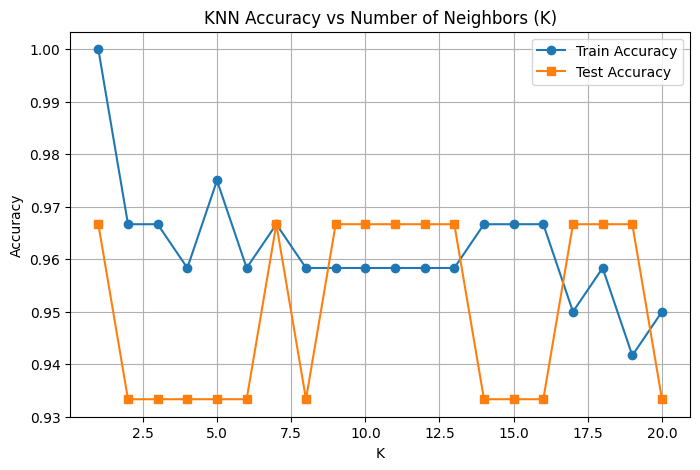

Best K value: 1


In [49]:
k_values = range(1, 21)
train_acc, test_acc = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label="Train Accuracy")
plt.plot(k_values, test_acc, marker='s', label="Test Accuracy")
plt.title("KNN Accuracy vs Number of Neighbors (K)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[int(np.argmax(test_acc))]
print(f"Best K value: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)


Accuracy (K=1): 0.9667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



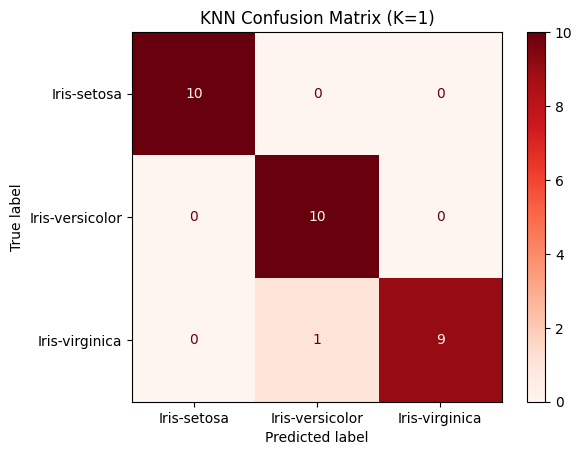

Cross-validation mean accuracy: 0.9467 ± 0.0340


In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay 

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (K={best_k}): {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(cmap="Reds")
plt.title(f"KNN Confusion Matrix (K={best_k})")
plt.show()

# Cross-validation
cv_scores = cross_val_score(knn_best, X_scaled, y_encoded, cv=5)
print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

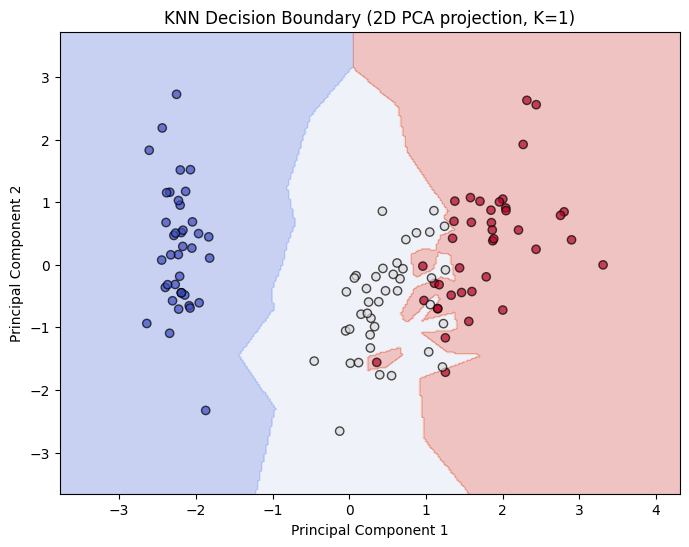

In [ ]:
from sklearn.decomposition import PCA #Principal Component Analysis

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

knn2d = KNeighborsClassifier(n_neighbors=best_k)
knn2d.fit(X_train_pca, y_train_pca)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

Z = knn2d.predict(np.c_[xx.ravel(), yy.ravel()])
if Z.dtype.kind not in ('i', 'f'):
    Z = pd.Categorical(Z).codes
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title(f"KNN Decision Boundary (2D PCA projection, K={best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()